In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2. Load Dataset
df = pd.read_csv('car data.csv')  # Replace with your actual CSV file
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'car data.csv'

In [3]:
  car data

SyntaxError: invalid syntax (3703210986.py, line 1)

In [4]:
df = pd.read_csv(' car data.csv')  # Replace with your actual CSV file
df.head()


FileNotFoundError: [Errno 2] No such file or directory: ' car data.csv'

In [5]:
df = pd.read_csv('data/car_data.csv')
  # Replace with your actual CSV file
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/car_data.csv'

In [6]:
df = pd.read_csv('data/car data.csv')
  # Replace with your actual CSV file
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# 3. Basic Info
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
# 4. Drop rows with missing values
df.dropna(inplace=True)

# Drop irrelevant columns if any
df.drop(columns=['Car_ID', 'Model'], inplace=True, errors='ignore')


In [9]:
sns.histplot(df['Price'], kde=True, color='orange')
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


KeyError: 'Price'

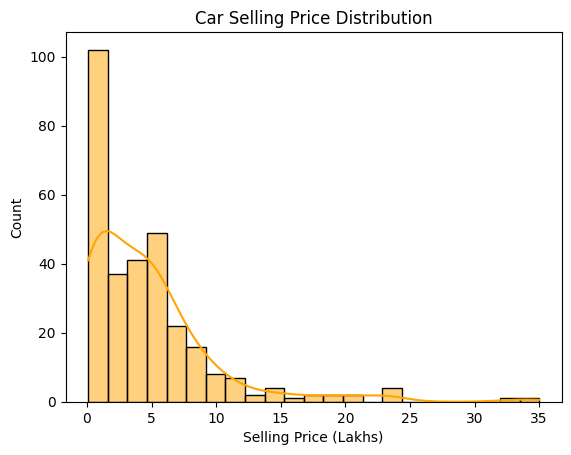

In [10]:
sns.histplot(df['Selling_Price'], kde=True, color='orange')
plt.title('Car Selling Price Distribution')
plt.xlabel('Selling Price (Lakhs)')
plt.ylabel('Count')
plt.show()


In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'ritz'

<Figure size 1000x600 with 0 Axes>

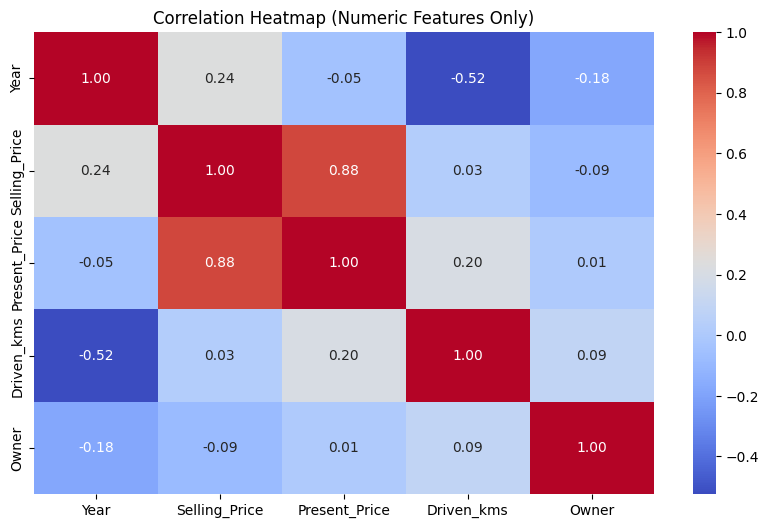

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [13]:
# Example: Brand vs Price
if 'Brand' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Brand', y='Price', data=df)
    plt.xticks(rotation=45)
    plt.title('Brand vs Price')
    plt.show()


In [14]:
# Mileage vs Price
if 'Mileage' in df.columns:
    sns.scatterplot(x='Mileage', y='Price', data=df)
    plt.title('Mileage vs Price')
    plt.show()

# Horsepower vs Price
if 'Horsepower' in df.columns:
    sns.scatterplot(x='Horsepower', y='Price', data=df)
    plt.title('Horsepower vs Price')
    plt.show()


In [15]:
# One-hot encode all categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [17]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n RMSE = {rmse:.2f}, R2 Score = {r2:.2f}\n")


Linear Regression:
 RMSE = 3.04, R2 Score = 0.60

Random Forest:
 RMSE = 0.91, R2 Score = 0.96

XGBoost:
 RMSE = 0.97, R2 Score = 0.96



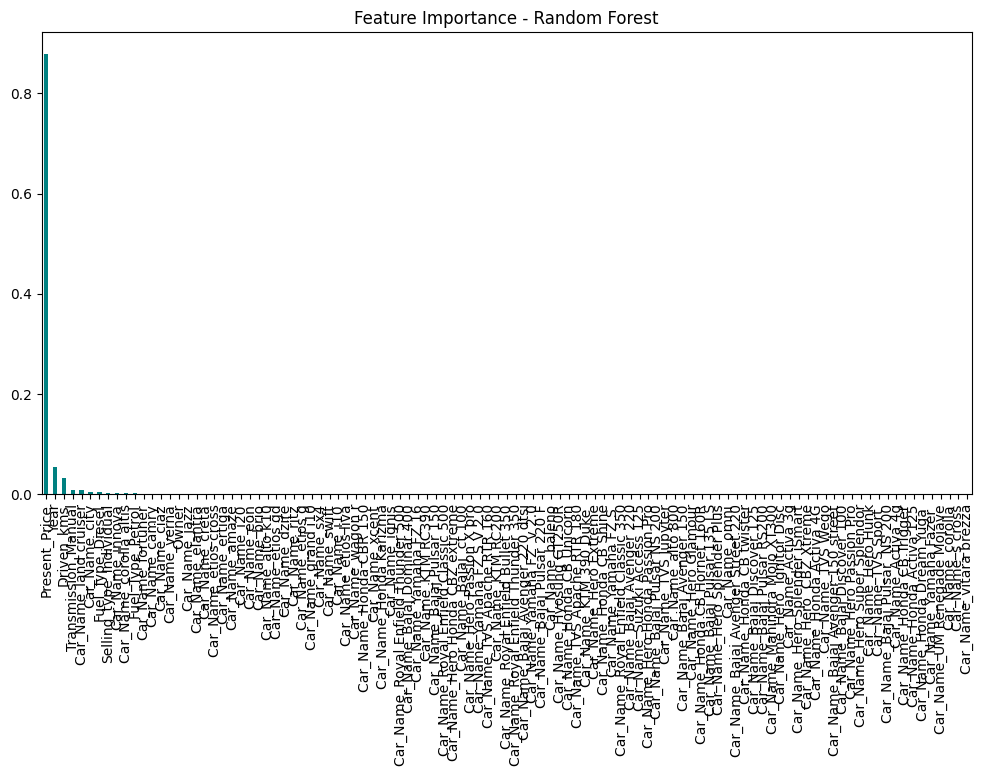

In [19]:
# Show feature importance from Random Forest
rf_model = models['Random Forest']
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Feature Importance - Random Forest')
plt.show()


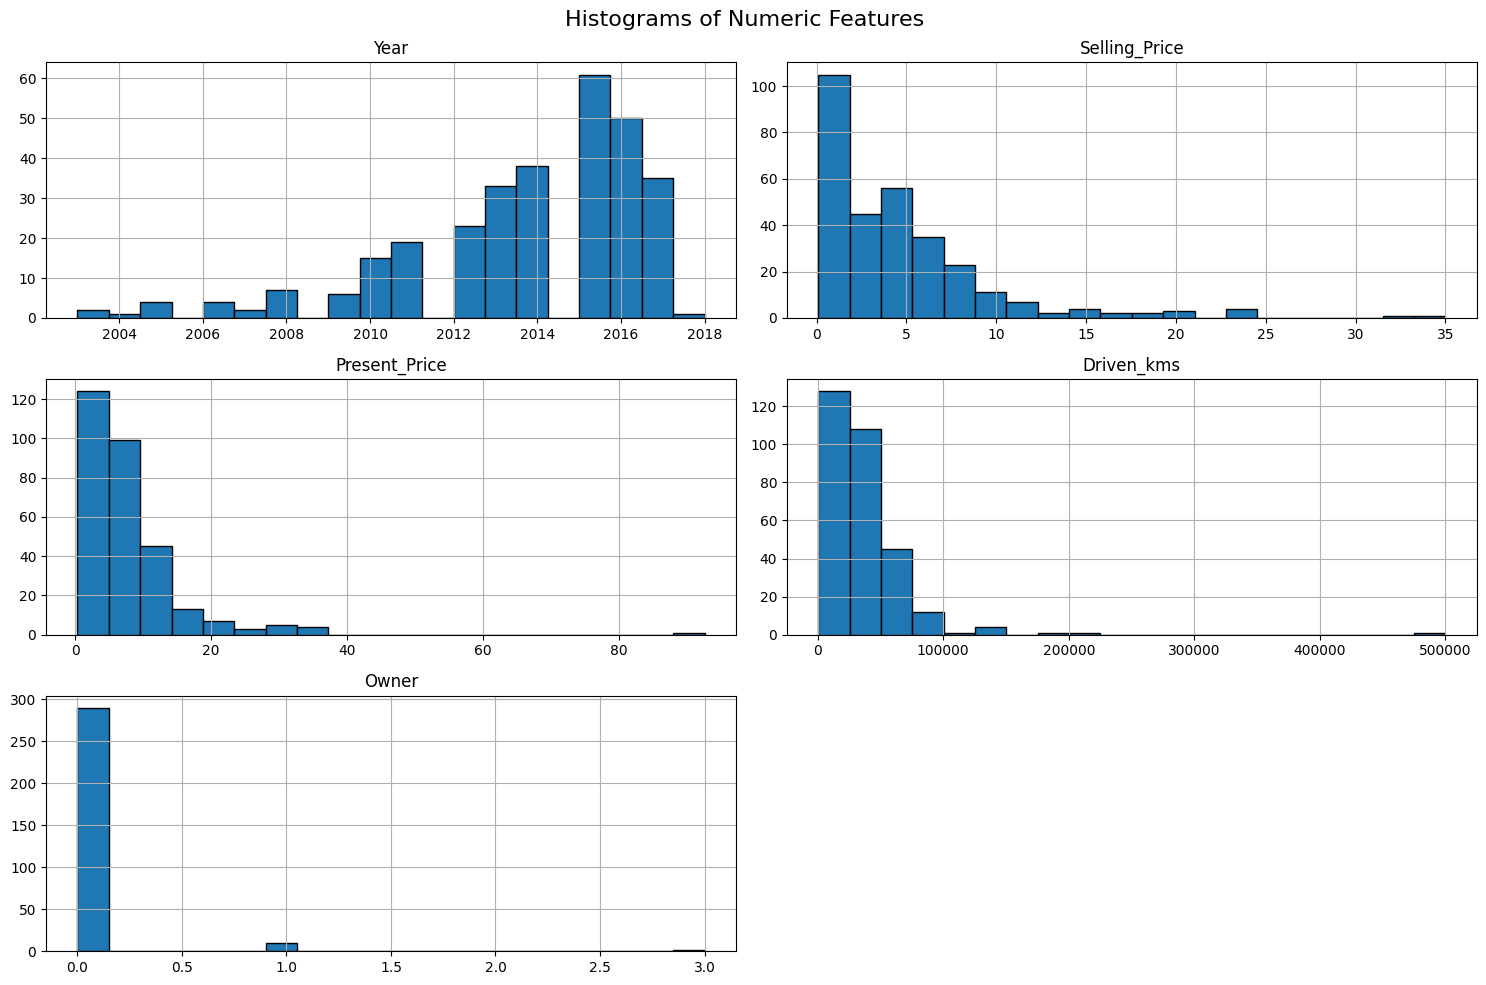

In [20]:
# Histogram of all numeric features
df.select_dtypes(include='number').hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()



In [23]:
print(df.columns.tolist())



['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100', 'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street', 'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi', 'Car_Name_Bajaj Avenger Street 220', 'Car_Name_Bajaj Discover 100', 'Car_Name_Bajaj Discover 125', 'Car_Name_Bajaj Dominar 400', 'Car_Name_Bajaj Pulsar  NS 200', 'Car_Name_Bajaj Pulsar 135 LS', 'Car_Name_Bajaj Pulsar 150', 'Car_Name_Bajaj Pulsar 220 F', 'Car_Name_Bajaj Pulsar NS 200', 'Car_Name_Bajaj Pulsar RS200', 'Car_Name_Hero  CBZ Xtreme', 'Car_Name_Hero  Ignitor Disc', 'Car_Name_Hero Extreme', 'Car_Name_Hero Glamour', 'Car_Name_Hero Honda CBZ extreme', 'Car_Name_Hero Honda Passion Pro', 'Car_Name_Hero Hunk', 'Car_Name_Hero Passion Pro', 'Car_Name_Hero Passion X pro', 'Car_Name_Hero Splender Plus', 'Car_Name_Hero Splender iSmart', 'Car_Name_Hero Super Splendor', 'Car_Name_Honda Activa 125', 'Car_Name_Honda Activa 4G', 

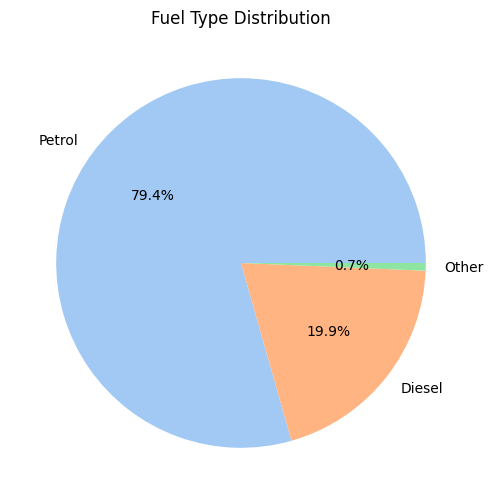

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fuel_counts = {
    'Petrol': df['Fuel_Type_Petrol'].sum(),
    'Diesel': df['Fuel_Type_Diesel'].sum(),
    'Other': len(df) - df['Fuel_Type_Petrol'].sum() - df['Fuel_Type_Diesel'].sum()
}

plt.figure(figsize=(6,6))
plt.pie(fuel_counts.values(), labels=fuel_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Fuel Type Distribution')
plt.show()


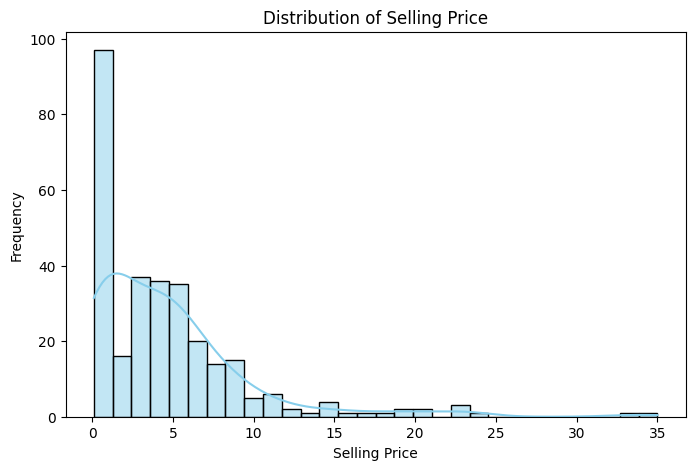

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


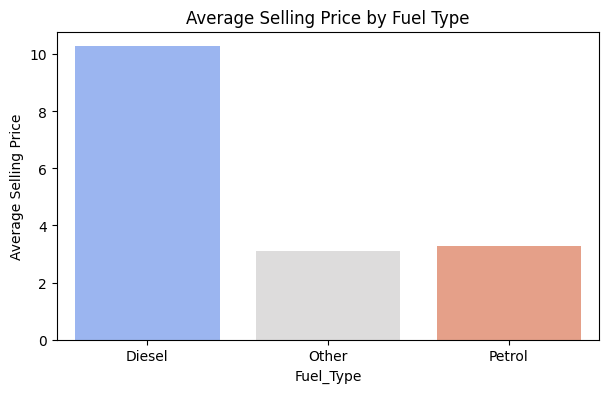

In [27]:
import numpy as np

df['Fuel_Type'] = np.where(df['Fuel_Type_Petrol'] == 1, 'Petrol',
                    np.where(df['Fuel_Type_Diesel'] == 1, 'Diesel', 'Other'))

avg_price_by_fuel = df.groupby('Fuel_Type')['Selling_Price'].mean()

plt.figure(figsize=(7,4))
sns.barplot(x=avg_price_by_fuel.index, y=avg_price_by_fuel.values, palette='coolwarm')
plt.title('Average Selling Price by Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()



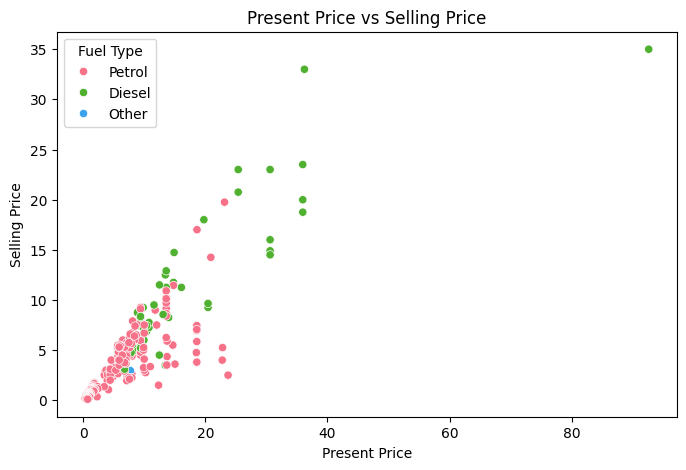

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type', palette='husl')
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()
